# TALLER NRO 2 ANALISIS UNIVARIADO
## CONJUNTO DE DATOS: datasetEmcali_Inputacion.xls

### PREGUNTA SMART

> ¿De qué manera podemos desarrollar un modelo predictivo basado en datos históricos recolectados cada hora de consumo energético, temperatura y fecha de medicion, para estimar con un margen de error menor al 10% la demanda de energía en Cali para los siguientes 7 dias, permitiendo una mejor planificación y distribución del suministro?

>> Específica: Se centra en la predicción de la demanda energética en Cali semanal.
>> Medible: Se establece un margen de error menor al 5%.
>> Alcanzable: Usa datos históricos y variables relevantes.
>> Relevante: Facilita la planificación y distribución del suministro permite cumplir con las normas de regulatorias de distribucion de energia.
>> Temporal: El pronóstico es a 7 dias

### Diccionario de datos:

- FECHA: Fecha en formato ISO de la lectura del consumo
- TEMPERATURA: Temperatura en grados Centigrados al momento de la toma del dato 
- DIA DE LA SEMANA: Numero de dia de la semana  0 Domingo, 1 Lunes, 2 Martes, 3 Miercoles, 4 Jueves, 5 Viernes, 6 Sabado
- HORA: Hora en formato numerico	
- TIPO DE DIA: Clasificacion del dia ordinario (de lunes a viernes), Sabado, domingo
- CONSUMO: Variable objetvio medido en MVA



In [9]:
#importamos las librerias para analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset desde un archivo .xlsx
df = pd.read_csv('../Data/datasetEmcali.csv')
print(df.head())
#mostramos la informacion del dataset
print(df.info())

             FECHA  TEMPERATURA  CONSUMO
0  12/01/2017 0:00         27.9    409.0
1  12/01/2017 1:00         29.0    387.0
2  12/01/2017 2:00         29.1    378.0
3  12/01/2017 3:00         28.2    370.0
4  12/01/2017 4:00         26.7    364.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29808 entries, 0 to 29807
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        29808 non-null  object 
 1   TEMPERATURA  29616 non-null  float64
 2   CONSUMO      29520 non-null  float64
dtypes: float64(2), object(1)
memory usage: 698.8+ KB
None


## COLUMNA SELECCIONADA: TEMPERATURA

> HIPOTESIS: La temperatura es una variable clave en el análisis del consumo de energía, ya que influye directamente en el uso por parte de los usarios de equipos electronicos para mejorar el confort termico (Aires acondicionados, Ventiladores, entre otros) en la ciudad cali. Influye en la toma de decisiones porque entre mas temperatura mayor consumo de energia

>

> La temperatura es relevante en el análisis del consumo energético en Cali, ya que afecta directamente la demanda de electricidad, especialmente por el uso de equipos electronicos para el confort termico. En el análisis, permite identificar patrones estacionales y predecir picos de consumo, facilitando la toma de decisiones para optimizar la distribución de energía en la ciudad de Cali.





# PUNTO 2: Análisis univariado en Python

### LIMPIEZA DE DATOS

In [11]:
#revisamos si hay datos duplicados
print(df.duplicated().sum())
#mostramos los datos duplicados y el cruce de filas duplicadas

print(df.describe())
#mostramos la cantidad de valores nulos
print(df.isnull().sum())
#inputamos los valores nulos de temperatura con la temeraura de la fila anterior, ya que la temperatura no varia mucho en un corto periodo de tiempo
df['TEMPERATURA'].fillna(method='ffill', inplace=True)
print(df.isnull().sum())
#eliminamos los valores nulos
df.dropna(inplace=True)
#mostramos la cantidad de valores nulos despues de eliminarlos
print(df.isnull().sum())

0
        TEMPERATURA       CONSUMO
count  29808.000000  29520.000000
mean      24.155726    455.574139
std        3.178165     95.616579
min       16.100000    227.000000
25%       21.800000    372.000000
50%       23.600000    447.000000
75%       26.400000    541.000000
max       34.000000    676.000000
FECHA            0
TEMPERATURA      0
CONSUMO        288
dtype: int64
FECHA            0
TEMPERATURA      0
CONSUMO        288
dtype: int64
FECHA          0
TEMPERATURA    0
CONSUMO        0
dtype: int64


C:\Users\rchic\AppData\Local\Temp\ipykernel_17640\2211212892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TEMPERATURA'].fillna(method='ffill', inplace=True)
C:\Users\rchic\AppData\Local\Temp\ipykernel_17640\2211212892.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TEMPERATURA'].fillna(method='ffill', inplace=True)


In [12]:
print(df.describe())

        TEMPERATURA       CONSUMO
count  29520.000000  29520.000000
mean      24.158882    455.574139
std        3.184461     95.616579
min       16.100000    227.000000
25%       21.800000    372.000000
50%       23.600000    447.000000
75%       26.400000    541.000000
max       34.000000    676.000000


In [24]:
#analisis univariado de la variable 'TEMPERATURA'
#Calculamos la media, mediana, moda, desviación estándar, valores atípicos, valores nulos y valores únicos
media = df['TEMPERATURA'].mean()
mediana = df['TEMPERATURA'].median()
moda = df['TEMPERATURA'].mode()
desviacion = df['TEMPERATURA'].std()
valores_atipicos = df['TEMPERATURA'].isnull().sum()
valores_nulos = df['TEMPERATURA'].isnull().sum()
#Imprimimos los resultados
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Desviación estándar:', desviacion)
print('Valores atípicos:', valores_atipicos)
print('Valores nulos:', valores_nulos)
if desviacion > (0.5 * media):
    print("La desviación estándar es alta, lo que indica una alta dispersión de los datos alrededor de la media.")
else:
    print("La desviación estándar es baja, lo que indica una baja dispersión de los datos alrededor de la media.")


Media: 24.158881775067748
Mediana: 23.6
Moda: 0    23.6
Name: TEMPERATURA, dtype: float64
Desviación estándar: 3.184461164127575
Valores atípicos: 0
Valores nulos: 0
La desviación estándar es baja, lo que indica una baja dispersión de los datos alrededor de la media.


### VISUALIZAMOS

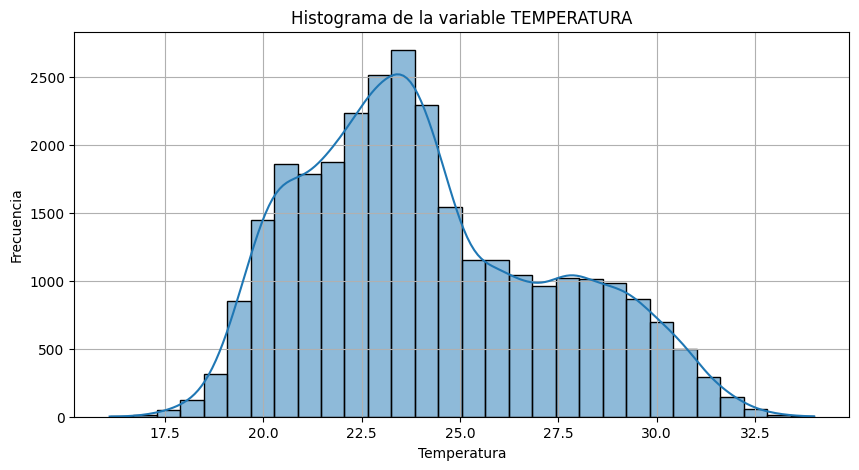

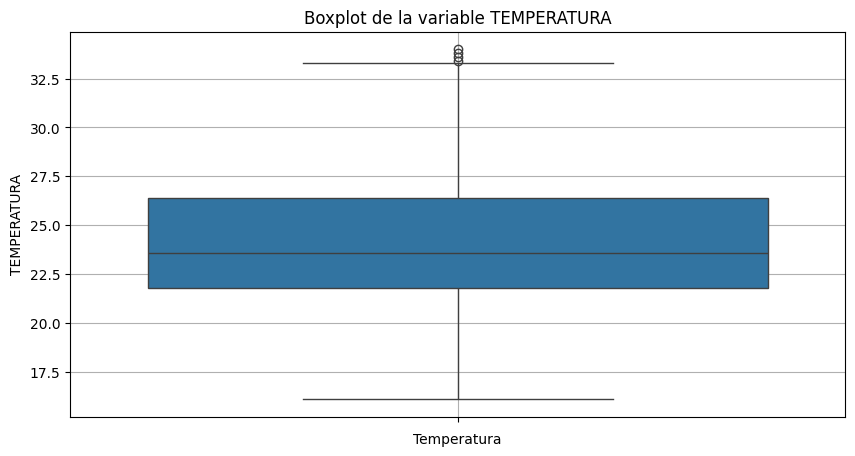

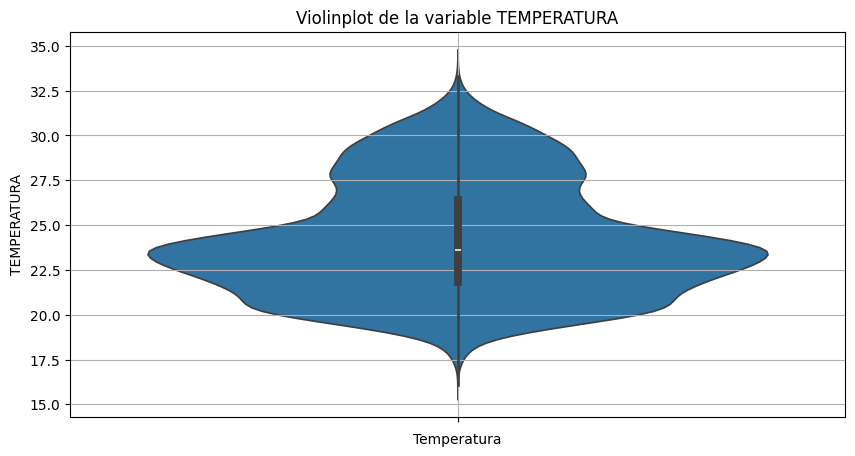

In [19]:
#Grafica de la variable 'TEMPERATURA' histograma, boxplot, violinplot
# Histograma con KDE
plt.figure(figsize=(10,5))
sns.histplot(df['TEMPERATURA'], bins=30, kde=True)
plt.title('Histograma de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['TEMPERATURA'])
plt.title('Boxplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.show()

# Violinplot
plt.figure(figsize=(10,5))
sns.violinplot(df['TEMPERATURA'])
plt.title('Violinplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.show()





### SESGOS O PATRONES

In [21]:
# Descriptive Statistics
print("Estadísticas Descriptivas de la variable TEMPERATURA:")
print(df['TEMPERATURA'].describe())

# Outliers Detection using IQR
Q1 = df['TEMPERATURA'].quantile(0.25)
Q3 = df['TEMPERATURA'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TEMPERATURA'] < (Q1 - 1.5 * IQR)) | (df['TEMPERATURA'] > (Q3 + 1.5 * IQR))]
print(f"Valores atípicos detectados:\n{outliers}")





Estadísticas Descriptivas de la variable TEMPERATURA:
count    29520.000000
mean        24.158882
std          3.184461
min         16.100000
25%         21.800000
50%         23.600000
75%         26.400000
max         34.000000
Name: TEMPERATURA, dtype: float64
Valores atípicos detectados:
                      FECHA  TEMPERATURA  CONSUMO
6015        8/08/2018 15:00         33.8    651.0
15207  8/26/2019 3:00:00 PM         34.0    662.0
15229  8/27/2019 1:00:00 PM         33.6    649.0
15517       9/08/2019 13:00         33.4    476.0


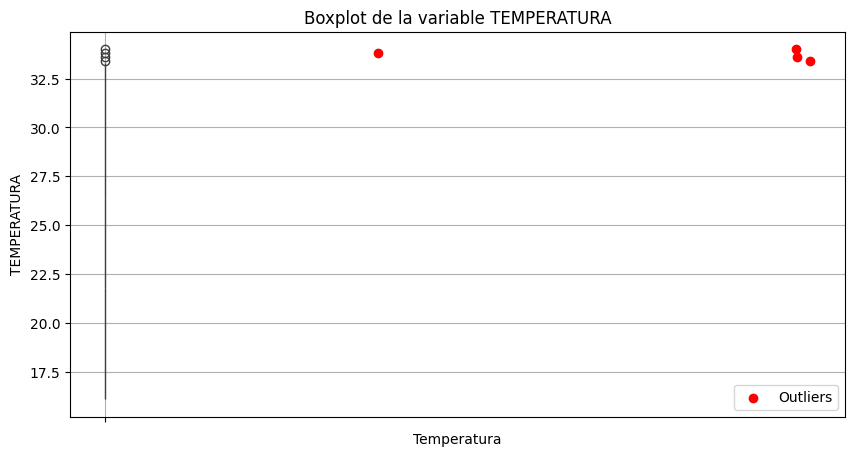

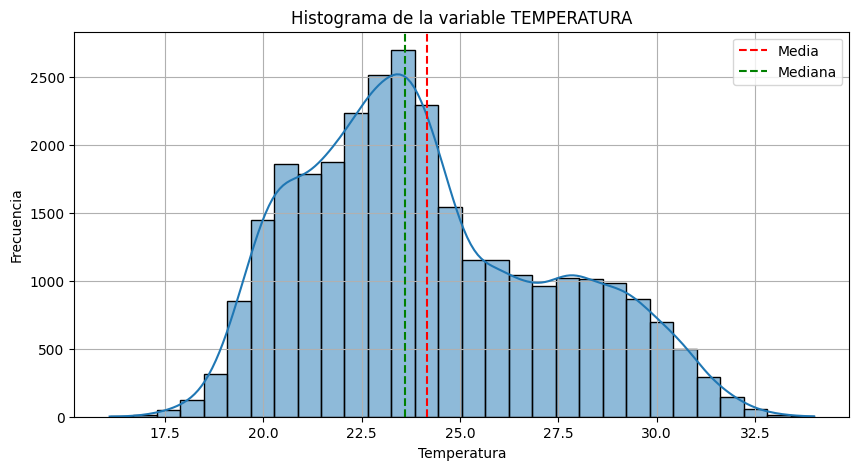

In [23]:
#graficamos los valores atipicos
plt.figure(figsize=(10,5))
sns.boxplot(df['TEMPERATURA'])
plt.scatter(outliers.index, outliers['TEMPERATURA'], color='r', label='Outliers')
plt.title('Boxplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.legend()
plt.show()

#graficamos posibles sesgos
plt.figure(figsize=(10,5))
sns.histplot(df['TEMPERATURA'], bins=30, kde=True)
plt.title('Histograma de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.axvline(df['TEMPERATURA'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df['TEMPERATURA'].median(), color='g', linestyle='--', label='Mediana')
plt.grid(True)
plt.legend()
plt.show()


### CONCLUSIONES DEL ANALISIS

- la Media, Mediana y Moda:  son similareslo que indica que la distribución es aproximadamente simétrica esto nos indica que no hay sesgos en la muestra
- La desviación estándar es baja, lo que indica una baja dispersión de los datos alrededor de la media.


- En el grafico de bloxplot podemos observar que la mayor parte de los datos de TEMPERATURA se encuentran entre 22°C y 27°C con posibles valores atibipos por encima de 33°C

- El histograma de la variable TEMPERATURA muestra una distribución que es aproximadamente asimétrica a la derecha, lo que significa que hay más valores concentrados en temperaturas más bajas, pero con una cola extendida hacia valores más altos. 
La media (línea roja) es ligeramente mayor que la mediana (línea verde), lo que indica que la distribución tiene valores atípicos o extremos en la parte alta de la temperatura.
La mayor frecuencia de temperaturas se encuentra entre aproximadamente 22°C

- En el Histograma se puede visualizar que la mayoría de las temperaturas en Cali están entre 22°C y 25°C, con una distribución ligeramente sesgada a la derecha pero no relevante. La media es mayor que la mediana, lo que indica la presencia de valores atípicos en temperaturas altas. 


